In [1]:
import tensorflow as tf
import numpy as np
 
from train_model import train_model
from data_processing import segment_spectrum, segment_spectrum_batch
from RamanNet_model import RamanNet


In [2]:
# prepare data
compound = 0
data_path = '/home/jeonggyu/workspace/data' 
X_datafile = data_path+'/DeepCID/augmented_data/ramcell/'+str(compound)+'component.npy' 
y_datafile = data_path+'/DeepCID/augmented_data/ramcell/'+str(compound)+'label.npy' 
#X_datafile = data_path+'/DeepCID/augmented_data/ramcell_backup/1019/ecoli_sa/'+str(compound)+'component.npy' 
#y_datafile = data_path+'/DeepCID/augmented_data/ramcell_backup/1019/ecoli_sa/'+str(compound)+'label.npy' 
#X_datafile = data_path+'/DeepCID/augmented_data/ramcell_backup/1019/ecoli_sa_mix6_mix8/'+str(compound)+'component.npy' 
#y_datafile = data_path+'/DeepCID/augmented_data/ramcell_backup/1019/ecoli_sa_mix6_mix8/'+str(compound)+'label.npy' 
wavenum_datafile = data_path+'/ramcell/wavenum.npy' 
X = np.load(X_datafile)
y = np.load(y_datafile)
wavenum = np.load(wavenum_datafile)
y = y.reshape(y.shape[0]).astype(np.int)
num = np.unique(y, axis=0)
num = num.shape[0]
y = np.eye(num)[y]

r = int(y.shape[0]*0.1+0.5)

X_train = X[0:r*6]
X_val = X[r*6:r*8]
X_test = X[r*8:]
y_train = y[0:r*6]
y_val = y[r*6:r*8]
y_test = y[r*8:]

print(X.shape, y.shape, wavenum.shape)
print(wavenum)

print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape)

(1076, 1015) (1076, 2) (1015,)
[1669.533203 1668.545898 1667.557617 ...  551.817383  550.578125
  549.337891]
(648, 1015) (216, 1015) (212, 1015) (648, 2) (216, 2) (212, 2)


/home/jeonggyu/venv_dir/py37/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [3]:
mdl, training_history = train_model(X_train, y_train, X_val, y_val,50,25,150,'/home/jeonggyu/workspace/data/RamanNet')

2022-11-18 14:47:09.110044: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 14:47:09.917710: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2022-11-18 14:47:09.918247: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 21869 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:68:00.0, compute capability: 8.6


Epoch 1/150
3/3 [==============================] - ETA: 0s - loss: 0.7740 - embedding_loss: 0.9916 - classification_loss: 0.5564 

2022-11-18 14:47:18.247644: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.



Epoch 1: val_loss improved from inf to 0.76849, saving model to /home/jeonggyu/workspace/data/RamanNet


2022-11-18 14:47:23.268019: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


KeyboardInterrupt: 

In [ ]:
w_len = 50
dw = 25
X_train_seg = segment_spectrum_batch(X_train, w_len, dw)
X_val_seg  = segment_spectrum_batch(X_val, w_len, dw)
X_test_seg  = segment_spectrum_batch(X_test, w_len, dw)
print(len(X_train_seg),len(y_train))
print(X_train_seg[0].shape)

y_test_argmax = np.argmax(y_test,axis=1)
y_train_argmax = np.argmax(y_train,axis=1)
y_val_argmax = np.argmax(y_val,axis=1)

In [ ]:
mdl(X_train_seg)[1].shape

In [ ]:
def accuracy(mdl,X,y,w_len,dw):
    X = segment_spectrum_batch(X, w_len, dw)
    predict = np.argmax(mdl(X)[1],axis=1)
    y = np.argmax(y,axis=1)
    unique, counts = np.unique(y - predict, return_counts = True)
    #print(predict,y)
    uniq_cnt_dict = dict(zip(unique, counts))
    print("accuracy = {}%\n{}".format(uniq_cnt_dict[0]/len(y),uniq_cnt_dict))
    return uniq_cnt_dict

In [ ]:
accuracy(mdl,X_train,y_train,w_len,dw)
accuracy(mdl,X_val,y_val,w_len,dw)
accuracy(mdl,X_test,y_test,w_len,dw)

In [ ]:
for i in range(100):
    layer = mdl.get_layer(index=i)
    print(layer.name)

In [ ]:
layer = mdl.get_layer(index=39)
print(layer.name)
print(layer.weights)
print(dir([layer.weights]))

In [1]:
weights = layer.get_weights()[0].T
biases = layer.get_weights()[1].T
print(weights[0])
print(biases[0])
print(weights[0]+biases[0])

NameError: name 'layer' is not defined

In [ ]:
from matplotlib import pyplot as plt 
plt.rcParams["figure.figsize"]=15,5
plt.plot(X[0])

In [ ]:
from matplotlib import pyplot as plt 
#plt.rcParams["figure.figsize"]=10,10
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 20}

plt.rc('font', **font)

#vmin=np.min(weights)+np.min(biases)           
#vmax=np.max(weights)+np.max(biases)

fig,axs=plt.subplots(25,39,figsize=(500,500))
for l in range(39):
    layer = mdl.get_layer(index=39+l)
    print(layer.name)
    weights = layer.get_weights()[0].T
    biases = layer.get_weights()[1].T
    for i in range(25):
        axs[i,l].plot(weights[i]+biases[i])
        axs[i,l].set_ylim([-1,1])
plt.show()
plt.savefig('dense_layer.png')


dense_123
dense_124
dense_125
dense_126
dense_127
dense_128
dense_129
dense_130
dense_131
dense_132
dense_133
dense_134
dense_135
dense_136
dense_137
dense_138
dense_139
dense_140
dense_141
dense_142
dense_143
dense_144
dense_145
dense_146
dense_147
dense_148
dense_149
dense_150
dense_151
dense_152
dense_153
dense_154
dense_155
dense_156
dense_157
dense_158
dense_159
dense_160
dense_161


dense_124


IndexError: index 25 is out of bounds for axis 0 with size 25

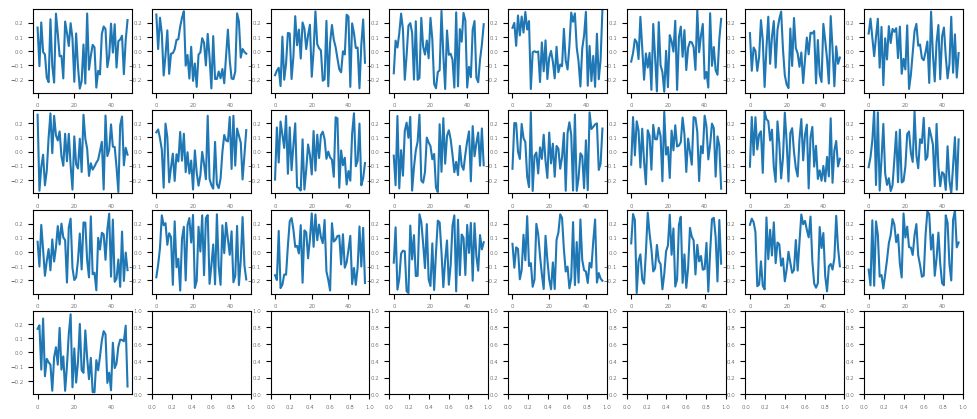

In [148]:
from matplotlib import pyplot as plt 
#plt.rcParams["figure.figsize"]=10,10
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 4}

plt.rc('font', **font)

fig,axs=plt.subplots(4,8,figsize=(12,5))

layer = mdl.get_layer(index=40)
print(layer.name)
weights = layer.get_weights()[0].T
biases = layer.get_weights()[1].T
vmin=np.min(weights)+np.min(biases)           
vmax=np.max(weights)+np.max(biases)

for i in range(4):
    for j in range(8):
        axs[i,j].plot(weights[i*8+j]+biases[i*8+j])
        axs[i,j].set_ylim([vmin,vmax])
plt.show()